In [1]:
# Import TensorFlow, the main library for building our model
import tensorflow as tf

# Import the specific tools we need from Keras (part of TensorFlow)
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Import other helpful libraries
import numpy as np
import matplotlib.pyplot as plt

print("Libraries imported successfully!")

2025-09-18 16:48:23.335332: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758214103.600210      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758214103.672924      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Libraries imported successfully!


In [2]:
# Load the dataset and split it into training and testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Dataset loaded successfully!")
print(f"Number of training images: {len(x_train)}")
print(f"Number of testing images: {len(x_test)}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Dataset loaded successfully!
Number of training images: 60000
Number of testing images: 10000


This image is supposed to be the number: 3


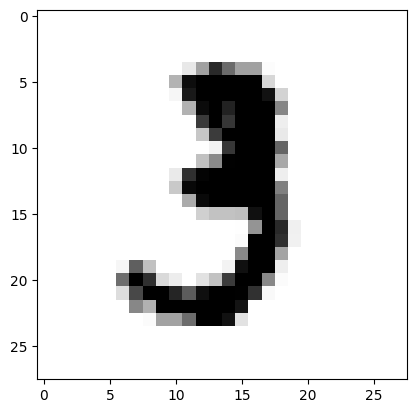

In [3]:
# Let's see what the first training image looks like
image_index = 10

# Print the label for the first image
print(f"This image is supposed to be the number: {y_train[image_index]}")

# Display the image
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

In [4]:
# Our model expects a 1D vector of inputs, so we flatten the 28x28 images
# into a single 784-pixel line (28 * 28 = 784).
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# We normalize the pixel values from a range of 0-255 to a range of 0-1.
# This helps the model learn more efficiently.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# We also need to convert our labels (0, 1, 2, etc.) into a "one-hot" format.
# For example, the number 5 becomes an array where the 6th position is 1 and all others are 0.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Data preprocessing complete!")
print(f"New shape of training images: {x_train.shape}")
print(f"Example of the first one-hot encoded label (which was a 5): \n{y_train[0]}")

Data preprocessing complete!
New shape of training images: (60000, 784)
Example of the first one-hot encoded label (which was a 5): 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [5]:
# Define the model architecture
model = Sequential([
    # First layer: A Dense layer with 128 neurons.
    # The 'relu' activation function helps the model learn complex patterns.
    # We specify input_shape=(784,) because our flattened images are 784 pixels long.
    Dense(128, activation='relu', input_shape=(784,)),
    
    # Output layer: A Dense layer with 10 neurons (one for each digit from 0-9).
    # The 'softmax' activation function turns the output into a probability score for each digit.
    Dense(10, activation='softmax')
])

# Print a summary of the model's architecture
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-09-18 16:48:44.308819: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("Model compiled successfully!")

Model compiled successfully!


In [7]:
# Train the model!
# We're telling it to go through the data 5 times (epochs)
# and to use the test data for validation to check its progress.
history = model.fit(x_train, y_train,
                    epochs=5,
                    validation_data=(x_test, y_test))

print("\nTraining complete! 🎉")

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8762 - loss: 0.4330 - val_accuracy: 0.9583 - val_loss: 0.1422
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9639 - loss: 0.1223 - val_accuracy: 0.9662 - val_loss: 0.1053
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9755 - loss: 0.0801 - val_accuracy: 0.9715 - val_loss: 0.0943
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9824 - loss: 0.0586 - val_accuracy: 0.9725 - val_loss: 0.0904
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9874 - loss: 0.0434 - val_accuracy: 0.9751 - val_loss: 0.0794

Training complete! 🎉


In [8]:
# Evaluate the model on the test set to get the final numbers
loss, accuracy = model.evaluate(x_test, y_test)

print(f"\nFinal Test Accuracy: {accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9703 - loss: 0.0956

Final Test Accuracy: 97.51%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


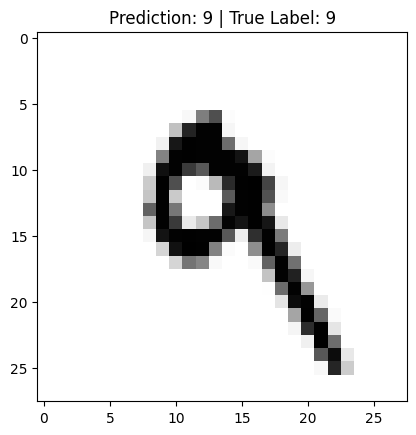

In [9]:
# Select an image from the test set (you can change the index)
image_index = 7
image_to_predict = x_test[image_index]
true_label = np.argmax(y_test[image_index]) # Get the actual number

# The model expects a batch of images, so we add a dimension
prediction = model.predict(np.array([image_to_predict]))
predicted_digit = np.argmax(prediction)

# Display the image and the prediction
plt.imshow(image_to_predict.reshape(28, 28), cmap='Greys')
plt.title(f"Prediction: {predicted_digit} | True Label: {true_label}")
plt.show()